In [5]:
from pymatgen.ext.matproj import MPRester
import numpy as np
import pandas as pd
import os
import df_CIF as cif

In [3]:
# Ask the user if they would upload the cif file themselves or download from materials project
response = input('Do you want to upload the cif file by yourself? (y/n):')

Do you want to upload the cif file by yourself? (y/n): n


In [7]:
# Sequential input promp to define the range of band gaps the user is interested.
# Here for a fast demo, we strict the range to a narrow gap to reduce the datasize.
# Sequential input promp to define the range of band gaps the user is interested.
if response == 'n':
    api = input('Please provide with you API here:')
    lower_bound = float(input('Please provide the lower bound of the bandgap:'))
    higher_bound = float(input('Please provide the higher bound of the bandgap:'))
    path = input('Please provide a saving path for the cif files here:')
    data = cif.CIFdownload(api, path, lower_bound, higher_bound)
    # append the structure with the pretty formula and bandgap values
    bandgap = []
    pretty_formula = []
    for i in range(len(data)):
        bandgap.append(data[i]['band_gap'])
        pretty_formula.append(data[i]['pretty_formula'])
    dict = {'pretty_formula': pretty_formula, 'bandgap': bandgap}
    df1 = pd.DataFrame(data = dict)  # The subdataframe that contains the pretty formula and the band gap

    # read cell parameters from the cif files and compile into a dataframe
    cell = cif.CIFconvert(path) 
    
    
    df = pd.concat([df1, cell], axis = 1)

    # save the final dataframe into the path of the cif files.
    df.to_csv(path+'CIF_data.csv')
    
if response == 'y':
    path = input('Please provide the path of your cif files here:')
    cell = cif.CIFconvert(path) 
    cell.to_csv(path+'CIF_data.csv')

Please provide with you API here: rIn4iGCK5MpgmdWtQtJ
Please provide the lower bound of the bandgap: 1.8
Please provide the higher bound of the bandgap: 1.9
Please provide a saving path for the cif files here: /Users/yifeihe/DIRECT/win22_project/test_folder/


100%|█████████████████████████████████████| 1375/1375 [00:01<00:00, 1049.47it/s]


In the assigned directory, the downloaded raw data has been saved as individual cif files for each compound and a .csv file containing the formula and the structure was also created in the same path.

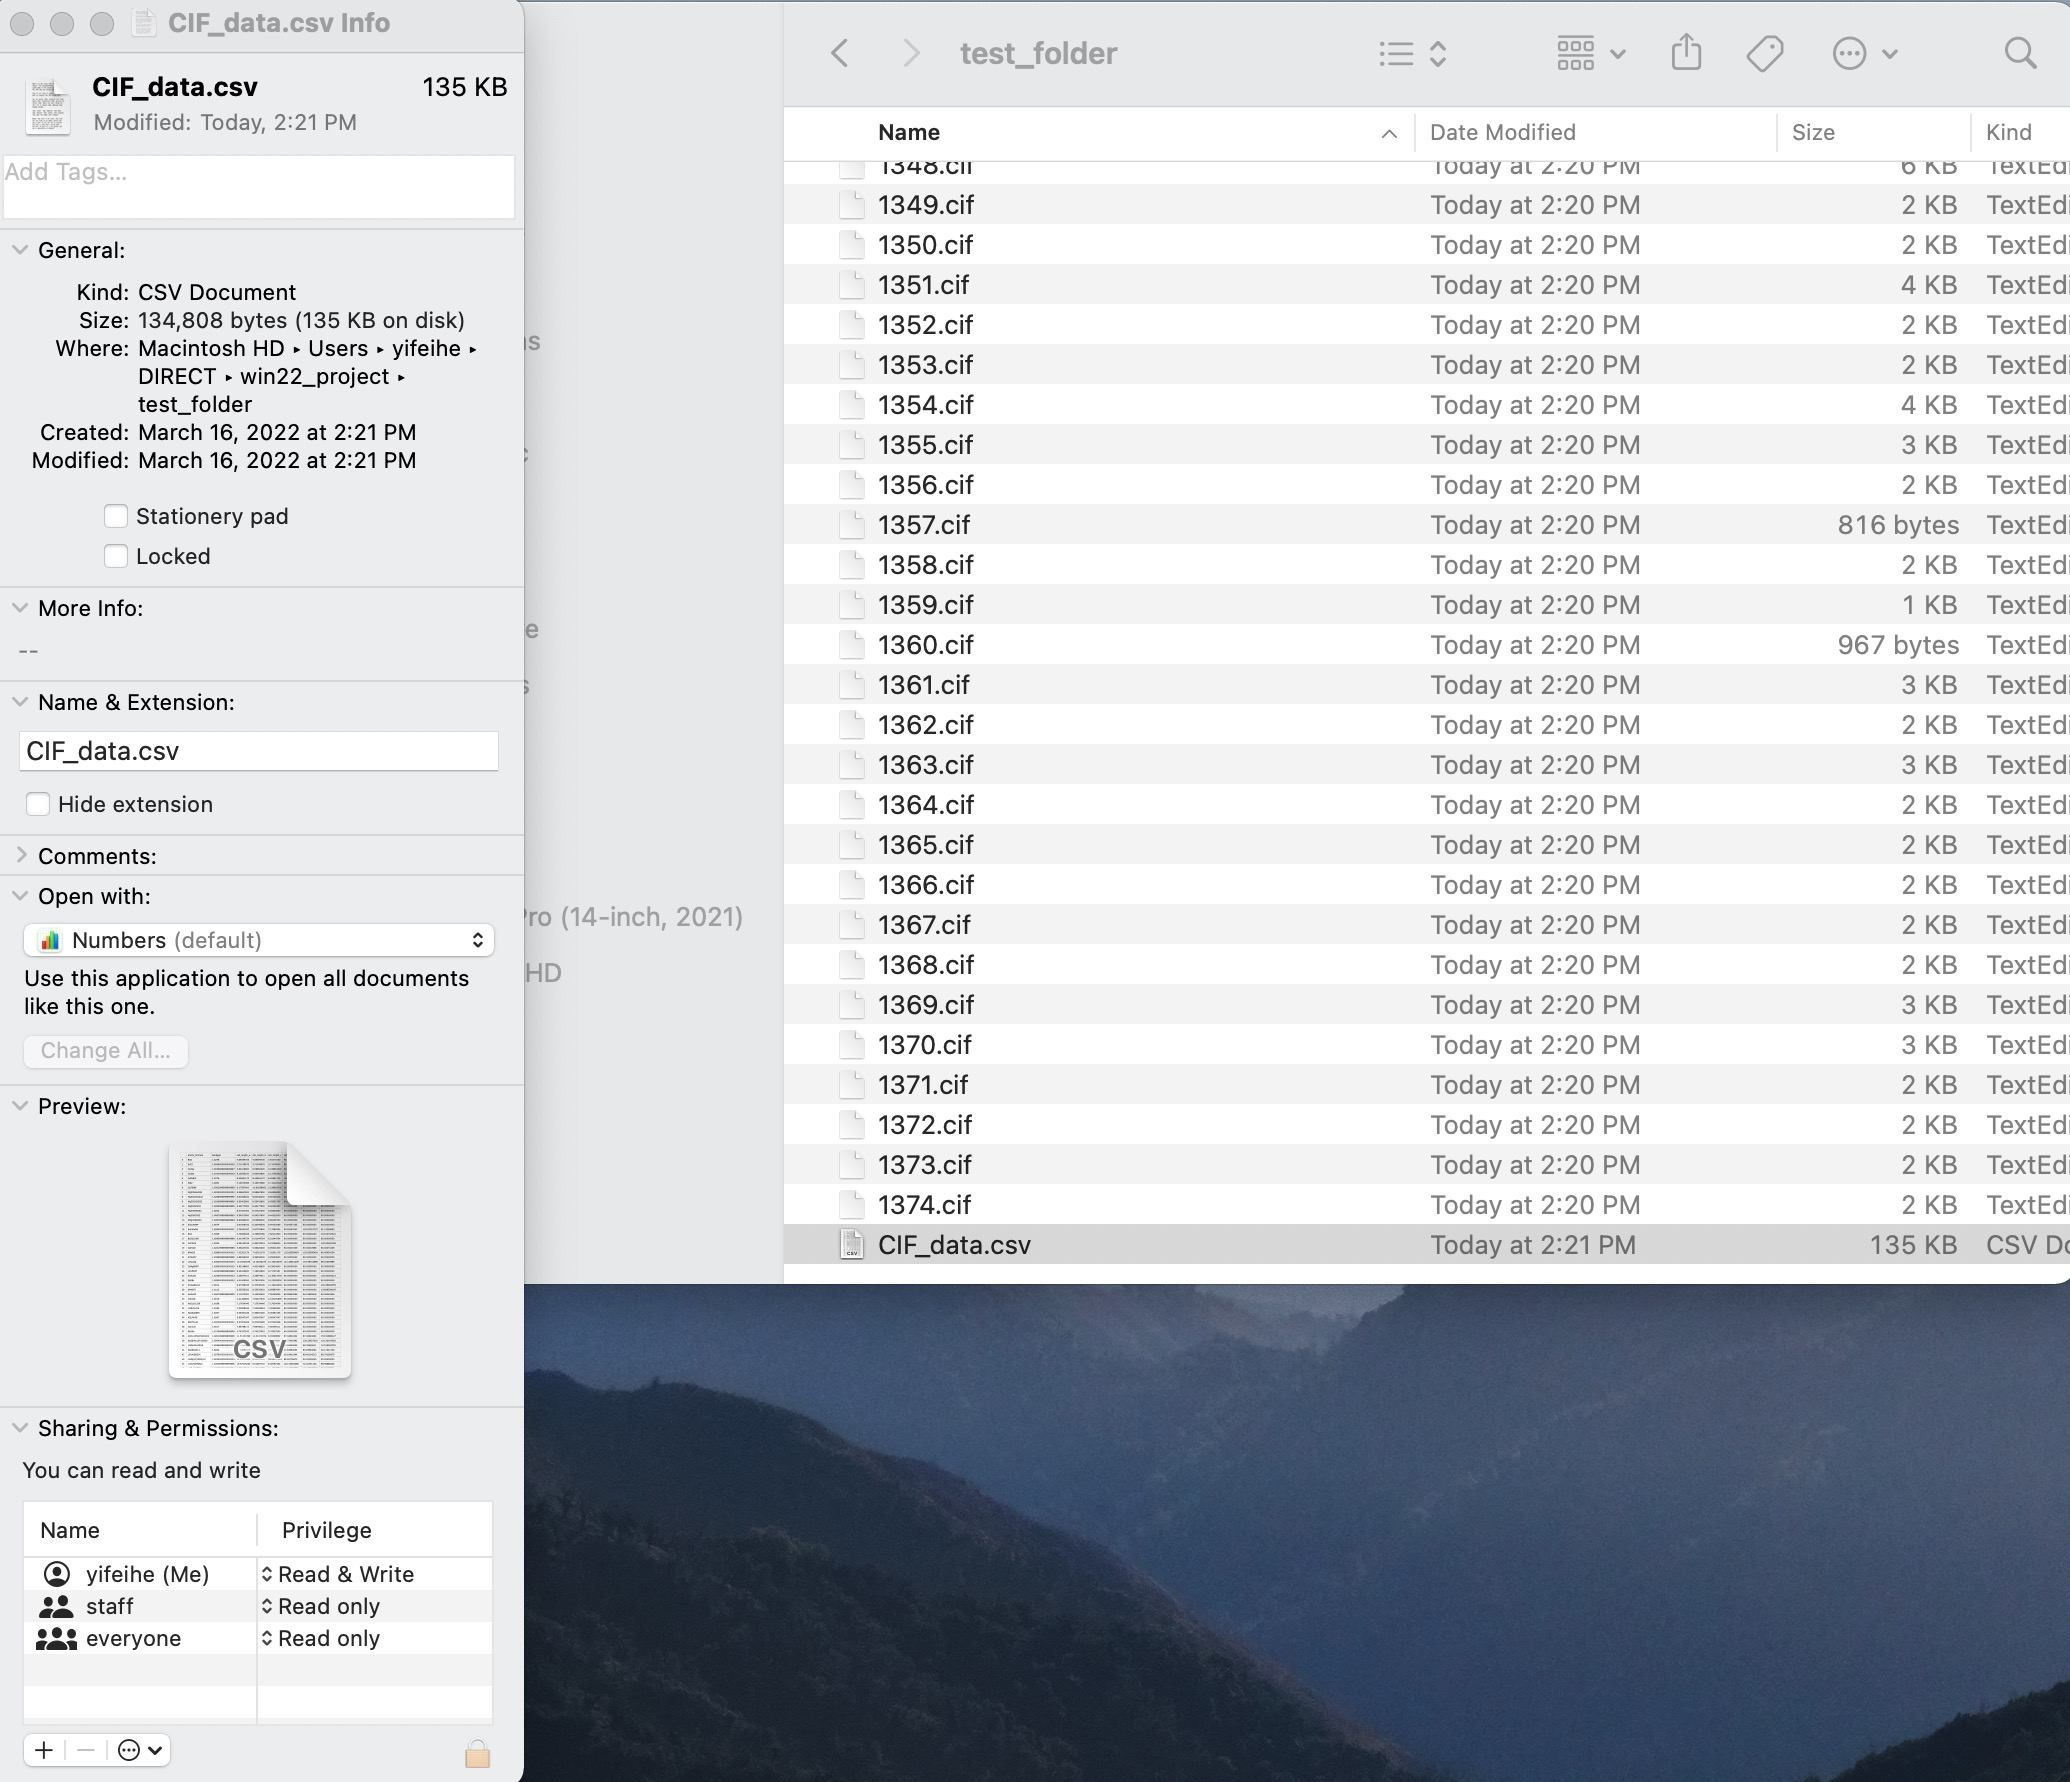